# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [1]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import json

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [2]:
### 💡 Première requête guidée

BASE_URL = "https://api.openweathermap.org/data/2.5"

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    # Votre code ici pour l'appel API
    # Gérez les erreurs HTTP !
    response = requests.get(url, params=params)

    # Vérifier le code de réponse HTTP
    if response.status_code == 200:
        # Succès : on retourne les données JSON
        return response.json()


In [3]:
city = "Amsterdam"
api_key = "bf7a350a744821fa176077add813cb8a"

Amsterdam_meteo = get_weather_data(city, api_key)
print("Météo actuelle à Amsterdam:")
print(Amsterdam_meteo)

Météo actuelle à Amsterdam:
{'coord': {'lon': 4.8897, 'lat': 52.374}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'peu nuageux', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22.13, 'feels_like': 21.68, 'temp_min': 21.03, 'temp_max': 23.27, 'pressure': 1016, 'humidity': 49, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1753797759, 'sys': {'type': 2, 'id': 2046553, 'country': 'NL', 'sunrise': 1753761367, 'sunset': 1753817850}, 'timezone': 7200, 'id': 2759794, 'name': 'Amsterdam', 'cod': 200}


In [4]:
# Configuration API
API_KEY = "bf7a350a744821fa176077add813cb8a"  # Remplacez par votre vraie clé
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?

- Comment gérer une ville introuvable ?

---

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [5]:
# Configuration Visual Crossing
VC_API_KEY = "8L62PSQM5AARFM59KE36HZRGH"
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    url = f"{VC_BASE_URL}/{city}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed,pressure'
    }
    # Requête API
    response = requests.get(url, params=params)

    # Vérifier la réponse
    if response.status_code == 200:
        data = response.json()
        if 'days' in data:
            # Extraire les données journalières
            days = data['days']
            df = pd.DataFrame(days)
            return df


In [6]:
city = "Berlin"
api_key = "8L62PSQM5AARFM59KE36HZRGH"

historical_weather = get_historical_weather(city, api_key)
print ("Historique de météo : Berlin ")
print(historical_weather)


Historique de météo : Berlin 
      datetime  temp  humidity  precip  windspeed  pressure
0   2025-07-29  65.5      65.3   0.000       15.0    1012.6
1   2025-07-30  64.9      62.6   0.000        7.6    1013.0
2   2025-07-31  61.7      70.2   0.044       11.2    1010.1
3   2025-08-01  64.5      69.6   0.036        8.9    1007.3
4   2025-08-02  65.5      67.7   0.000        8.7    1008.0
5   2025-08-03  62.8      72.7   0.016       13.0    1016.0
6   2025-08-04  61.2      79.0   0.102        9.4    1017.8
7   2025-08-05  60.4      84.3   0.499       11.9    1010.0
8   2025-08-06  59.6      88.1   0.402       14.3    1012.2
9   2025-08-07  63.8      65.6   0.000       13.6    1018.7
10  2025-08-08  66.1      57.7   0.000        7.8    1019.9
11  2025-08-09  66.3      59.1   0.004        5.6    1018.4
12  2025-08-10  68.8      54.7   0.000        4.4    1021.0
13  2025-08-11  71.9      52.0   0.000        9.2    1022.6
14  2025-08-12  71.5      55.4   0.000        6.7    1024.0


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [7]:
from datetime import datetime, timedelta
import pandas as pd

# Liste des villes à analyser
ville = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

# DataFrame vide pour stocker toutes les villes
df_total = pd.DataFrame()

# Boucle sur les villes
for ville in ville:
    df = get_historical_weather(ville, VC_API_KEY)
    if df is not None:
        df["ville"] = ville
        df_total = pd.concat([df_total, df], ignore_index=True)

# Sélectionner et renommer les colonnes
df_total = df_total[["datetime", "ville", "temp", "humidity", "precip", "windspeed"]]
df_total.columns = ["date", "ville", "temperature", "humidite", "precipitation", "vent"]

# Affichage du DataFrame final
print(df_total)


          date   ville  temperature  humidite  precipitation  vent
0   2025-07-29   Paris         62.8      76.4          0.032  10.3
1   2025-07-30   Paris         65.9      77.7          0.028   7.8
2   2025-07-31   Paris         66.2      79.7          0.138   7.2
3   2025-08-01   Paris         64.8      79.9          0.052   8.3
4   2025-08-02   Paris         64.1      66.6          0.004   5.6
..         ...     ...          ...       ...            ...   ...
70  2025-08-08  Vienna         68.4      45.7          0.000   3.7
71  2025-08-09  Vienna         74.3      39.1          0.000   4.7
72  2025-08-10  Vienna         76.8      50.5          0.000   6.5
73  2025-08-11  Vienna         75.4      49.0          0.004   5.6
74  2025-08-12  Vienna         74.7      43.5          0.000   5.8

[75 rows x 6 columns]


In [8]:
# Partie 3 : API supplémentaire - Qualité de l'air
# 🌬️ API OpenWeatherMap Air Pollution

import requests

def get_air_quality(lat, lon, api_key):
    """
    Récupère les données de qualité de l'air 
    """
    url = "http://api.openweathermap.org/data/2.5/air_pollution"
    
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key
    }
    
    #  faire la requête
    response = requests.get(url, params=params)

    # vérifier la réponse
    if response.status_code == 200:
        data = response.json()
        
        # extraire les données utiles
        if 'list' in data and len(data['list']) > 0:
            pollution = data['list'][0]
            
            result = {
                "aqi": pollution["main"]["aqi"],
                "pm2_5": pollution["components"]["pm2_5"],
                "pm10": pollution["components"]["pm10"],
                "o3": pollution["components"]["o3"],
                "no2": pollution["components"]["no2"],
                "so2": pollution["components"]["so2"],
                "co": pollution["components"]["co"]
            }
            return result
            

In [9]:
# Exemple : coordonnées de Paris
latitude = 48.8566
lon = 2.3522
api_key = "bf7a350a744821fa176077add813cb8a"

air_paris = get_air_quality(latitude, lon, api_key)
print("Données qualité de l'air Paris :")
print(air_paris)


Données qualité de l'air Paris :
{'aqi': 2, 'pm2_5': 1.16, 'pm10': 1.54, 'o3': 77.45, 'no2': 0.57, 'so2': 0.15, 'co': 117.76}


In [13]:
### 🗺️ Obtenir les coordonnées
def get_coordinates(ville, api_key):

    # 1. L’URL de l’API 
    url = "http://api.openweathermap.org/geo/1.0/direct"

    # 2. Les paramètres à envoyer à l’API
    params = {
        'q': ville,       
        'appid': api_key 
    }

    # 3. On envoie la requête GET 
    response = requests.get(url, params=params)

    # 4. Vérifie si la requête a réussi
    if response.status_code == 200:
        data = response.json()  # On transforme la réponse JSON en objet Python (liste)
        
        # 5. Vérifie si on a bien reçu au moins un résultat
        if data:
            # 6. On prend les coordonnées dans le 1er résultat
            lat = data[0]['lat']
            lon = data[0]['lon']
            return lat, lon



In [14]:
api_key = "bf7a350a744821fa176077add813cb8a"
ville = "Berlin"

coordonnees = get_coordinates(ville, api_key)

if coordonnees:
    print(f"Coordonnées de {ville} : Latitude = {coordonnees[0]}, Longitude = {coordonnees[1]}")
else:
    print("Impossible de récupérer les coordonnées.")


Coordonnées de Berlin : Latitude = 52.5170365, Longitude = 13.3888599



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

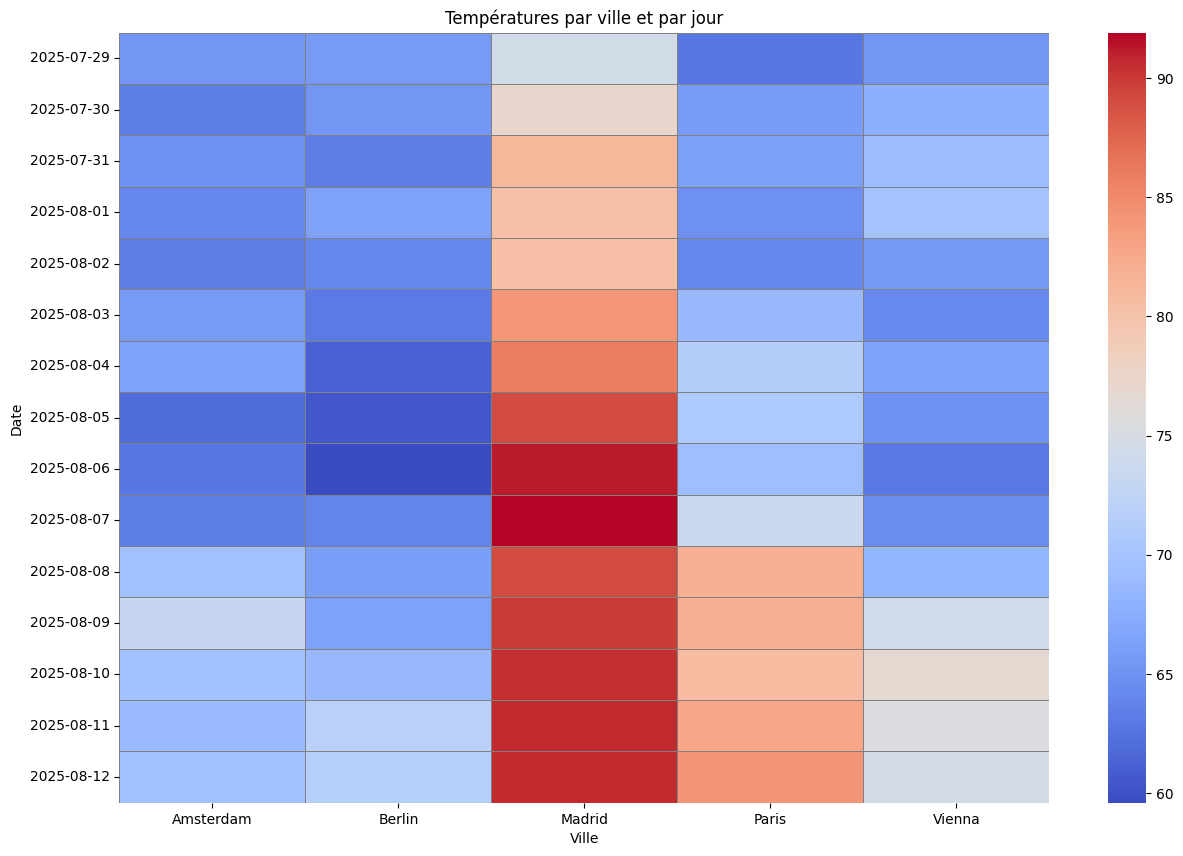

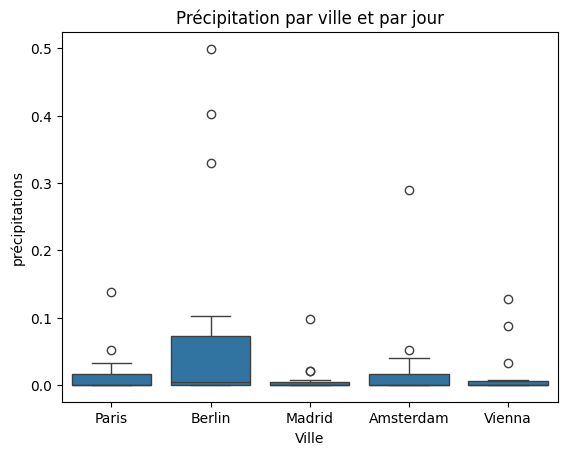

<function matplotlib.pyplot.show(close=None, block=None)>

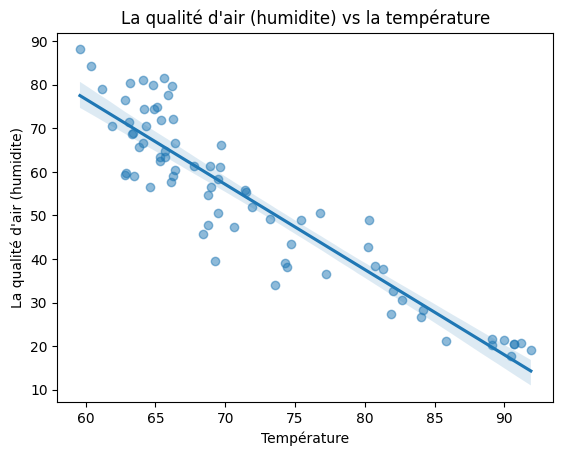

In [16]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 10))

# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot_temp = df_total.pivot_table(index='date', columns='ville', values='temperature')
sns.heatmap(pivot_temp, cmap="coolwarm", linewidths=0.5, linecolor='gray')

#  un titre
plt.title("Températures par ville et par jour")
plt.xlabel("Ville")
plt.ylabel("Date")

plt.show()

# # 2. Boxplot comparatif des précipitations
# # Utilisez seaborn.boxplot()
sns.boxplot(x= "ville", y= "precipitation", data = df_total)

plt.title("Précipitation par ville et par jour")
plt.xlabel("Ville")
plt.ylabel("précipitations")

plt.show()

# # 3. Scatter plot qualité air vs température
# # Ajoutez une regression line avec seaborn.regplot()
sns.regplot(x="temperature", y='humidite', data=df_total, scatter_kws={"alpha":0.5})

plt.title("La qualité d'air (humidite) vs la température")
plt.xlabel("Température")
plt.ylabel("La qualité d'air (humidite)")

plt.show

# Precipitation

/tmp/ipykernel_70359/161788561.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="ville", y="precipitation", data=df_total, ci=None)


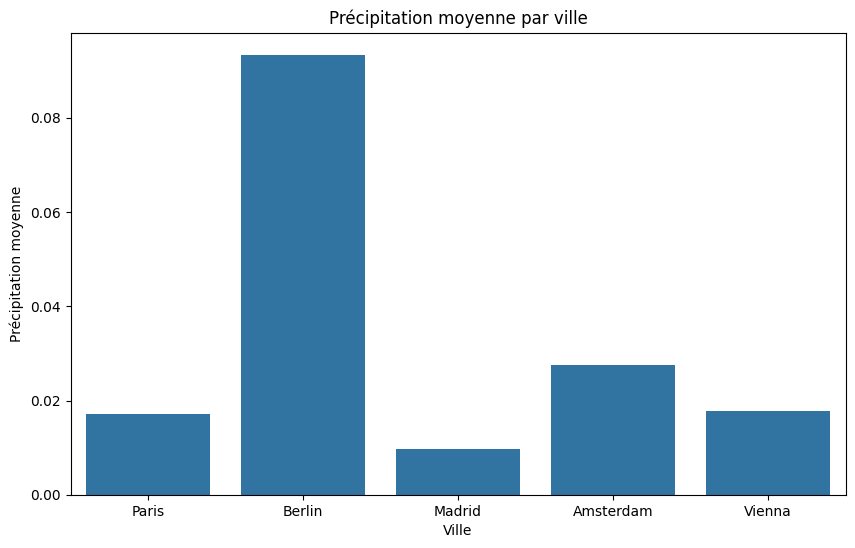

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="ville", y="precipitation", data=df_total, ci=None)

plt.title("Précipitation moyenne par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitation moyenne")
plt.show()

## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [ ]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [ ]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites